In [0]:
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
!pip install -q pandas_datareader

In [0]:
from pandas_datareader import data
!pip install fix-yahoo-finance

  Running setup.py bdist_wheel for fix-yahoo-finance ... - done
  Stored in directory: /content/.cache/pip/wheels/2c/ca/ce/218a19aaecf63fd74c75d6a6772b1a799fa05826d8762bfd83
  Running setup.py bdist_wheel for multitasking ... - done
  Stored in directory: /content/.cache/pip/wheels/41/e4/48/af808a1c57f43f104042abdaf80fa623ab213ca0268ba4189c
Successfully built fix-yahoo-finance multitasking


In [0]:
import fix_yahoo_finance as yf
yf.pdr_override() 

# Define the instruments to download. We would like to see Apple, Microsoft and the S&P500 index.
tickers = ['AAPL', 'MSFT', '^GSPC']

# We would like all available data from 01/01/2000 until 12/31/2016.
start_date = '2010-01-01'
end_date = '2016-12-31'

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
panel_data = data.get_data_yahoo('AAPL', start_date, end_date)

[*********************100%***********************]  1 of 1 downloaded


In [0]:
panel_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,30.490000,30.642857,30.340000,30.572857,20.616993,123432400
2010-01-05,30.657143,30.798571,30.464285,30.625713,20.652637,150476200
2010-01-06,30.625713,30.747143,30.107143,30.138571,20.324135,138040000
2010-01-07,30.250000,30.285715,29.864286,30.082857,20.286560,119282800
2010-01-08,30.042856,30.285715,29.865715,30.282858,20.421427,111902700


In [0]:
close = panel_data['Close']

In [0]:
all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')

In [0]:
close = close.reindex(all_weekdays)

In [0]:
close = close.fillna(method='ffill')

In [0]:
close.head()

2010-01-01          NaN
2010-01-04    30.572857
2010-01-05    30.625713
2010-01-06    30.138571
2010-01-07    30.082857
Freq: B, Name: Close, dtype: float64

In [0]:
# Calculate the 20 and 100 days moving averages of the closing prices
short_rolling_msft = close.rolling(window=20).mean()
long_rolling_msft = close.rolling(window=100).mean()
max_aapl = close.rolling(window=int(365/2)).max().drop_duplicates()
min_aapl = close.rolling(window=int(365/2)).min().drop_duplicates()
max_aapl.index


DatetimeIndex(['2010-01-01', '2010-09-14', '2010-09-16', '2010-09-20',
               '2010-09-21', '2010-09-22', '2010-09-23', '2010-09-24',
               '2010-10-08', '2010-10-11',
               ...
               '2016-08-22', '2016-08-23', '2016-08-24', '2016-09-15',
               '2016-10-10', '2016-10-11', '2016-10-12', '2016-10-14',
               '2016-10-24', '2016-10-25'],
              dtype='datetime64[ns]', length=216, freq=None)

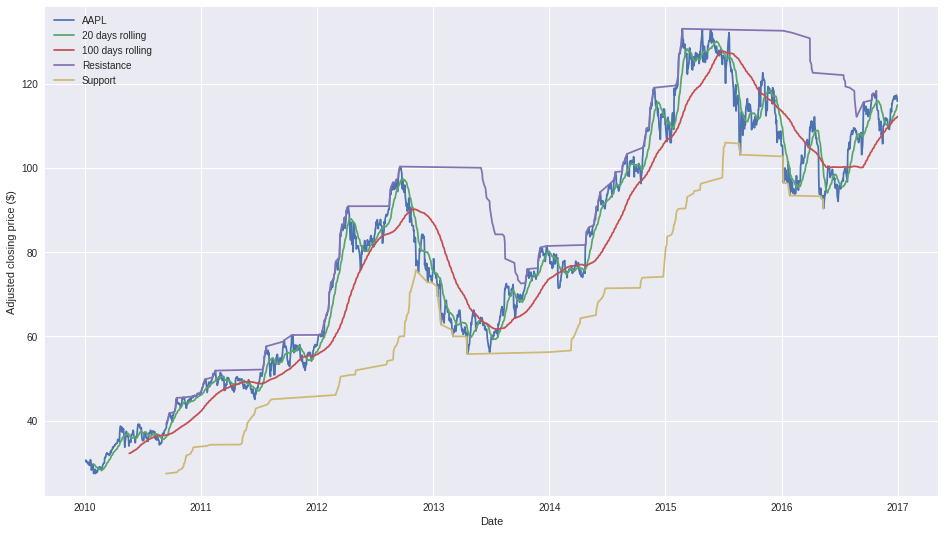

In [0]:
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(close.index, close, label='AAPL')
ax.plot(short_rolling_msft.index, short_rolling_msft, label='20 days rolling')
ax.plot(long_rolling_msft.index, long_rolling_msft, label='100 days rolling')
#plt.hlines(y=max_aapl.drop_duplicates(),xmin=2010, xmax=2017, color='r', linestyle='-')
i = 1
while i < 3:
  ax.plot(max_aapl.index, max_aapl, label='Resistance')
  ax.plot(min_aapl.index, min_aapl, label='Support')
  if(i == 1):
    break
  i = i+1
ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()